In [7]:
import importlib

import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

import keras
from keras import backend as K
import train

import pandas as pd

import cv2

keras.__version__

'1.2.1'

In [2]:
importlib.reload(train)

<module 'train' from '/home/dtyeh/2017/carnd1/CarND-Behavioral-Cloning-P3/train.py'>

In [2]:
#csvpath = "./mydata/"
#image_path = "/mnt/g/gshare/carnd/fwd2/IMG/"
image_path = "./fwd2/IMG/"
csvpath = "./fwd2/"
#lines = train.loadDriveLog(csvpath)
#angles = np.array([float(x[3]) for x in lines])

In [3]:
df=pd.read_csv(csvpath + "driving_log.csv", header=None, names=["center", "left", "right", "angle", "throttle", "brake", "speed"])

In [19]:
pos_entry = df[df.angle > 0.].iloc[10]
neg_entry = df[df.angle < -0.1].iloc[10]; neg_entry
zero_entry = df[df.angle == 0.].iloc[10]; zero_entry

dfsub = pd.DataFrame([pos_entry, neg_entry, zero_entry]); dfsub

,center,left,right,angle,throttle,brake,speed
10,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,0.516663,0.380295,0,5.878299
38,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,-0.233020,0.312515,0,12.673360
74,G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_...,G:\gshare\carnd\fwd2\IMG\left_2017_05_03_06_24...,G:\gshare\carnd\fwd2\IMG\right_2017_05_03_06_2...,0.000000,0.264101,0,16.804620


In [20]:
X_train = train.loadImagesPd(dfsub, image_path)
y_train = dfsub["angle"].values

print(X_train.shape)


(3, 160, 320, 3)


In [13]:
# import cv2
# filename=dfsub["center"][10].split('\\')[-1]
# img = train.loadImage(filename, image_path)
# plt.imshow(img)
# plt.show()

# img = cv2.imread(image_path + filename); img
# plt.imshow(img)
# plt.show()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()

# imgs = np.zeros((2,img.shape[0], img.shape[1], img.shape[2]))
# imgs[0,:,:,:] = img
# print(img)
# print(imgs[0])
# plt.imshow(imgs[0])
# plt.show()

In [21]:
iter=dfsub.itertuples()
row=next(iter)
print(row.center)
print(row.angle)

G:\gshare\carnd\fwd2\IMG\center_2017_05_03_06_24_05_633.jpg
0.5166625


max: 255
min: 0


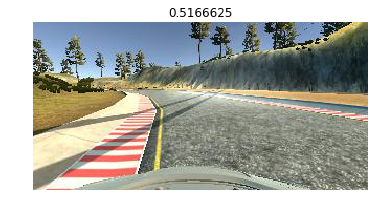

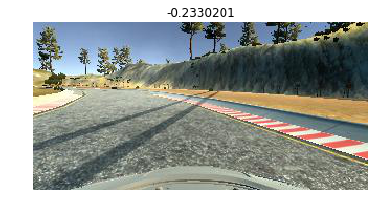

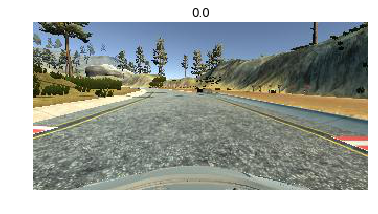

In [25]:
print("max:", np.max(X_train))
print("min:", np.min(X_train))

#import matplotlib.pyplot as plt
#from matplotlib.colors import hsv_to_rgb
get_ipython().magic('matplotlib inline')
# plt.figure(1, figsize=(15,15))
for i in range(3):
#     plt.subplot(3,1,i+1)
    idx = i
#     plt.imshow(cv2.flip(X_train[idx], 1))
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title('{}'.format(y_train[idx,]))
    plt.show()

mean:	 0.0945474666667
median:	 0.0
std:	 0.313273488372
mode:	 ModeResult(mode=array([-0.2330201]), count=array([1]))


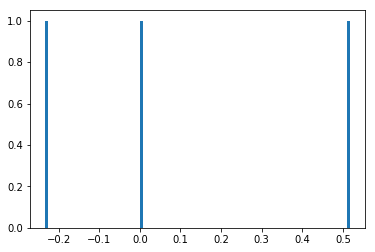

In [15]:
### Plot some statistics
print("mean:\t", np.mean(y_train))
print("median:\t", np.median(y_train))
print("std:\t", np.std(y_train))
print("mode:\t", scipy.stats.mode(y_train))

plt.hist(y_train, bins=100)
plt.show()

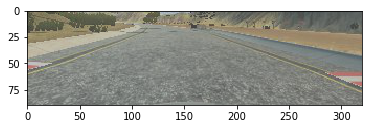

In [16]:
### check the cropping
model = train.nvidiaModel()
get_1st_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_1st_layer_output([X_train])[0]
plt.imshow(layer_output[2]*0.5 - 0.5)

In [ ]:
history = train.train(model, X_train, y_train, epochs=30)

In [ ]:
y_predict = model.predict(X_train)
print(y_predict)
print(y_train)

In [ ]:
importlib.reload(train)
print(df.iloc[0:10]["angle"])

#i = np.array([0, 9, 5, 3,])
i = np.arange(10)
g = train.generate_data(df.iloc[i], image_path, batch_size=4)
x,y = next(g)
print(x.shape)
print(y)

In [ ]:
history=train.train_gen(model, df.iloc[i], image_path, batch_size=32, epochs=20)
# help(model.fit_generator)

In [3]:
help(keras.models.Sequential.fit_generator)

Help on function fit_generator in module keras.models:

fit_generator(self, generator, samples_per_epoch, nb_epoch, verbose=1, callbacks=None, validation_data=None, nb_val_samples=None, class_weight=None, max_q_size=10, nb_worker=1, pickle_safe=False, initial_epoch=0, **kwargs)
    Fits the model on data generated batch-by-batch by
    a Python generator.
    The generator is run in parallel to the model, for efficiency.
    For instance, this allows you to do real-time data augmentation
    on images on CPU in parallel to training your model on GPU.
    
    # Arguments
        generator: a generator.
            The output of the generator must be either
            - a tuple (inputs, targets)
            - a tuple (inputs, targets, sample_weights).
            All arrays should contain the same number of samples.
            The generator is expected to loop over its data
            indefinitely. An epoch finishes when `samples_per_epoch`
            samples have been seen by the m

In [ ]:
X_test = train.loadImagesPd(df.iloc[i], image_path)
y_predict = model.predict(X_test)
print(y_predict)
print(df.iloc[i]["angle"])